##### Load libs:

In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

##### 1.Create connect:

In [2]:
connect = sqlite3.connect('../data/checking-logs.sqlite')

##### 2.Load data:

In [3]:
data = pd.read_csv('../data/data_prev_day.csv')
data

,uid,diff,time,group
0,user_1,-103.333333,after,test
1,user_1,-6.000000,before,test
2,user_18,-10.000000,after,test
3,user_18,-3.500000,before,test
4,user_19,-82.333333,after,test
5,user_19,-148.000000,before,test
6,user_21,-78.500000,after,test
7,user_21,-112.500000,before,test
8,user_25,-127.500000,after,test
9,user_25,-69.333333,before,test


In [4]:
box_data = data[['uid','group']].drop_duplicates(keep='first')
box_data['before'] = list(data[data.time == 'before']['diff'])
box_data['after'] = list(data[data.time == 'after']['diff'])
box_data

,uid,group,before,after
0,user_1,test,-6.000000,-103.333333
2,user_18,test,-3.500000,-10.000000
4,user_19,test,-148.000000,-82.333333
6,user_21,test,-112.500000,-78.500000
8,user_25,test,-69.333333,-127.500000
10,user_28,test,-53.000000,-136.500000
12,user_3,test,-70.000000,-158.500000
14,user_12,control,-103.000000,-75.000000
16,user_13,control,-15.500000,-81.500000
18,user_15,control,-3.000000,-32.000000


##### 3.BoxPlot:

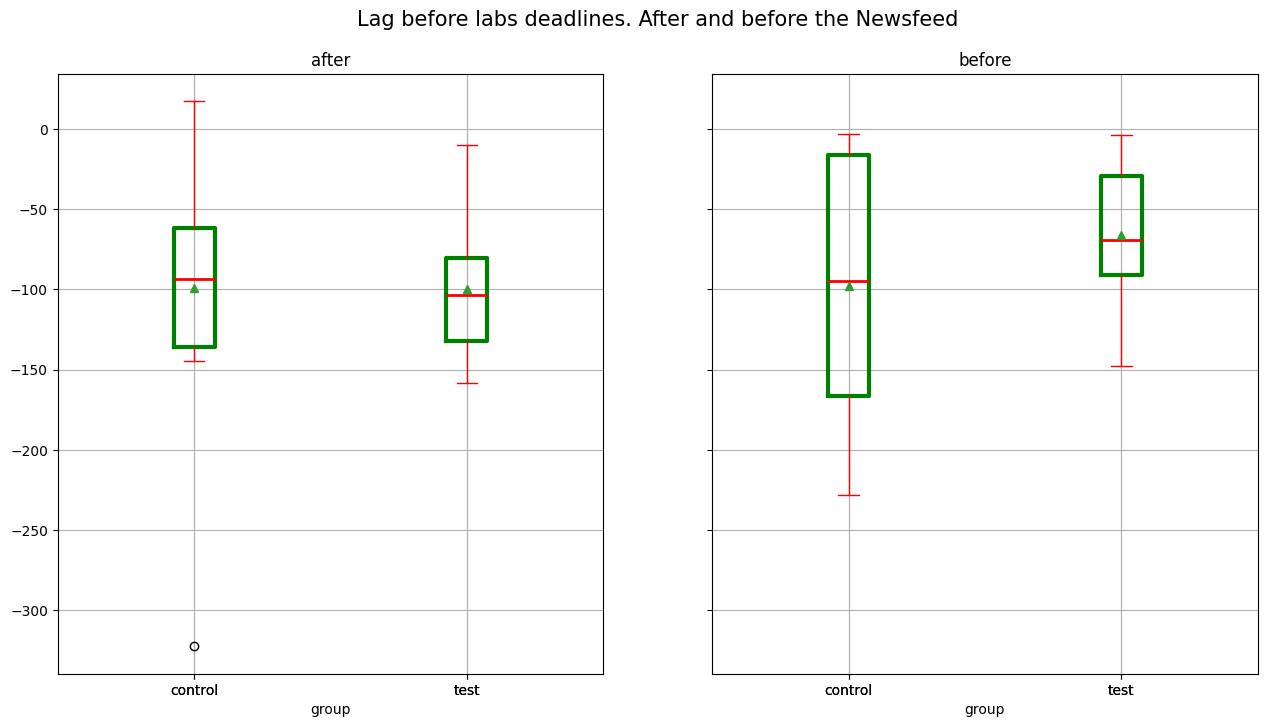

In [5]:
boxprops = dict(linewidth=3, color='green')
whiskerprops = dict(color='red')
meanlineprops = dict(linewidth=2, color='red')
box_data.boxplot(column=['after','before'], by = 'group',
           showmeans=True,
           medianprops=meanlineprops,
           boxprops=boxprops,
           whiskerprops=whiskerprops,
           capprops=dict(color='red'),
           figsize = (15,8))
plt.suptitle('Lag before labs deadlines. After and before the Newsfeed', fontsize=15)
plt.show()

##### 4.Question:

Каков был межквартильный размах контрольной группы до появления новостей?<br>Ответ: 150

##### 5.Close connect:

In [6]:
connect.close()